In [175]:
import pandas as pd

In [176]:
train = pd.read_csv("FIFA_train.csv")
test = pd.read_csv("FIFA_test.csv")

print(train.head())
print(test.head())

   id          name  age      continent contract_until position prefer_foot  \
0   0      L. Messi   31  south america           2021       ST        left   
1   3        De Gea   27         europe           2020       GK       right   
2   7     L. Suárez   31  south america           2021       ST       right   
3   8  Sergio Ramos   32         europe           2020       DF       right   
4   9      J. Oblak   25         europe           2021       GK       right   

   reputation  stat_overall  stat_potential  stat_skill_moves        value  
0         5.0            94              94               4.0  110500000.0  
1         4.0            91              93               1.0   72000000.0  
2         5.0            91              91               3.0   80000000.0  
3         4.0            91              91               3.0   51000000.0  
4         3.0            90              93               1.0   68000000.0  
   id               name  age      continent contract_until pos

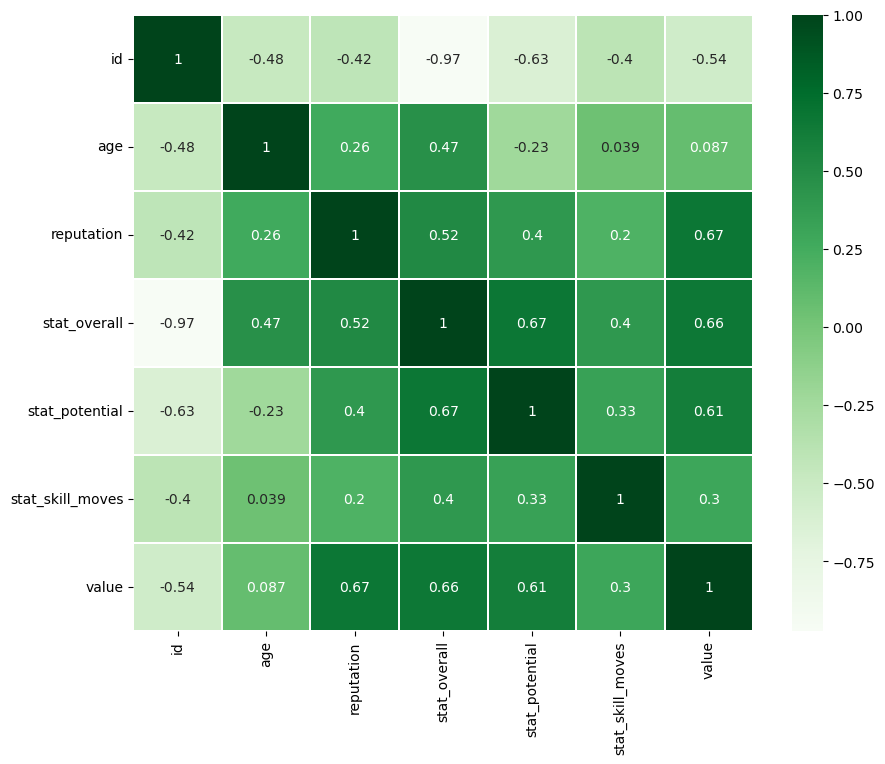

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
x = sns.heatmap(train.corr(), cmap = 'Greens', linewidths = '0.1',annot = True)

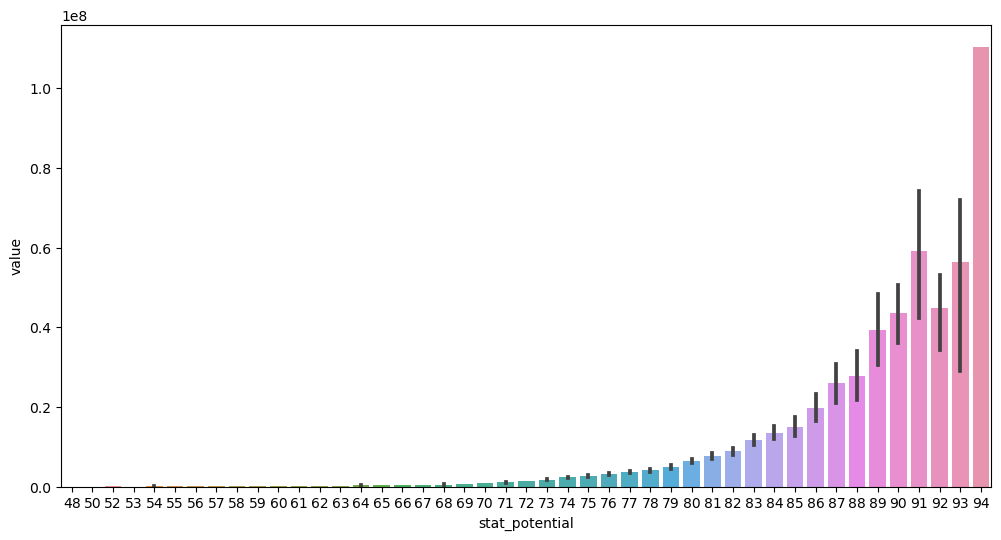

In [178]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="stat_potential", y="value", data=train)
plt.show()

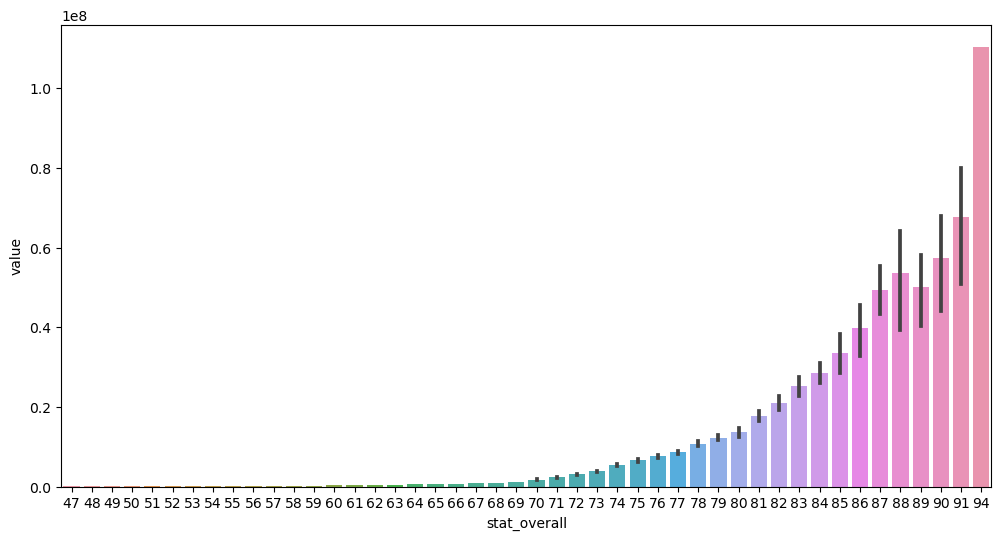

In [179]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="stat_overall", y="value", data=train)
plt.show()

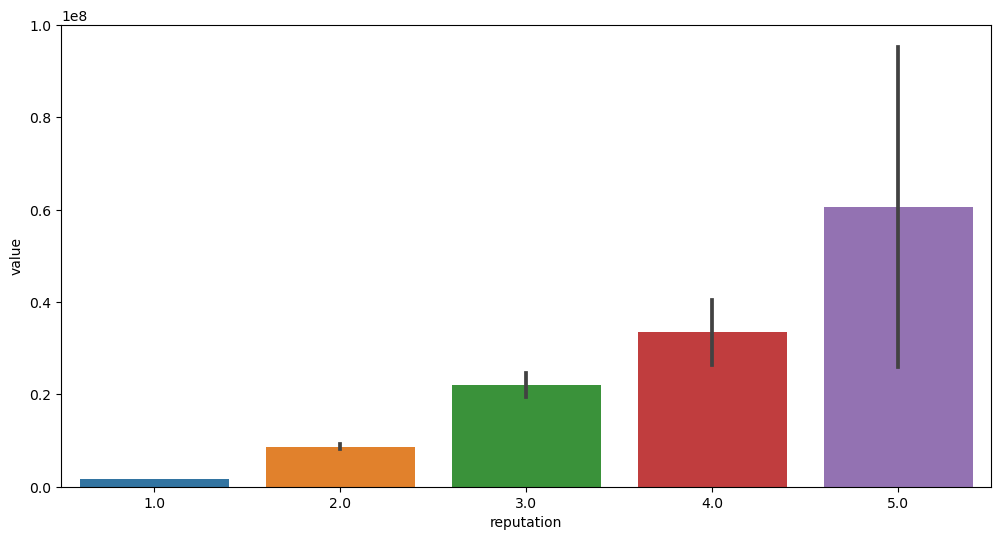

In [180]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="reputation", y="value", data=train)
plt.show()

In [181]:
train.drop(['id','age', 'name','continent','position','prefer_foot','contract_until','stat_skill_moves'], axis = 1, inplace = True)
test.drop(['id', 'age','name','continent','position','prefer_foot','contract_until','stat_skill_moves'], axis = 1, inplace = True)

print(train.head())
print(test.head())

   reputation  stat_overall  stat_potential        value
0         5.0            94              94  110500000.0
1         4.0            91              93   72000000.0
2         5.0            91              91   80000000.0
3         4.0            91              91   51000000.0
4         3.0            90              93   68000000.0
   reputation  stat_overall  stat_potential
0         5.0            94              94
1         5.0            92              93
2         4.0            91              92
3         4.0            91              91
4         4.0            91              91


In [182]:
from sklearn.model_selection import train_test_split

X = train.drop(['value'],axis =1)
y=train['value']

X_train, X_test, y_train, y_test = train_test_split(X ,y,test_size=0.3, shuffle=True)

In [183]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [184]:
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
y_test_scaled = ss.fit_transform(np.array(y_test).reshape(-1,1))
y_pred_scaled = ss.fit_transform(np.array(y_pred).reshape(-1,1))

RMSE = np.sqrt(mean_squared_error(y_test_scaled,y_pred_scaled))
print("RMSE is {}".format(RMSE))

RMSE is 0.6639130038838617


In [185]:
pred = reg.predict(test)

test['value'] = pred

In [186]:
test

,reputation,stat_overall,stat_potential,value
0,5.0,94,94,3.878985e+07
1,5.0,92,93,3.809361e+07
2,4.0,91,92,3.132479e+07
3,4.0,91,91,3.105919e+07
4,4.0,91,91,3.105919e+07
...,...,...,...,...
3823,1.0,48,63,-4.500032e+06
3824,1.0,48,65,-3.968825e+06
3825,1.0,48,65,-3.968825e+06
3826,1.0,47,61,-5.246556e+06
